In [1]:
##import librarirs
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as ss

In [2]:
## read data 
data=pd.read_csv("911.csv")

##first five rows of data 
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
##getting data info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        423909 non-null  float64
 1   lng        423909 non-null  float64
 2   desc       423909 non-null  object 
 3   zip        371780 non-null  float64
 4   title      423909 non-null  object 
 5   timeStamp  423909 non-null  object 
 6   twp        423750 non-null  object 
 7   addr       423909 non-null  object 
 8   e          423909 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [4]:
data.describe()

,lat,lng,zip,e
count,423909.000000,423909.000000,371780.000000,423909.0
mean,40.158618,-75.314022,19234.732269,1.0
std,0.129170,0.656048,301.388898,0.0
min,0.000000,-119.698206,3366.000000,1.0
25%,40.099784,-75.391547,19038.000000,1.0
50%,40.143900,-75.304563,19401.000000,1.0
75%,40.229008,-75.210760,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


In [6]:
##cheaking null value 
data.isnull().sum()

lat              0
lng              0
desc             0
zip          52129
title            0
timeStamp        0
twp            159
addr             0
e                0
dtype: int64

As we see there  are many missing value in zip and township column  so therefore if we look for top value in zipand township  we have to keep in mind that much of zip code data and some of  town ship data is missing 

In [8]:
##top 5 zip code 
data['zip'].value_counts().head()

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

In [9]:
## top 5 town ship 
data['twp'].value_counts().head()

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

In [11]:
## let us see how  many title are  unique 
data['title'].nunique()

141

In [14]:
## seprate titile heading from tite column 
data['reasons']=data['title'].apply(lambda x :x.split(':')[0])

In [15]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [16]:
data['reasons'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: reasons, dtype: int64

<AxesSubplot: xlabel='reasons', ylabel='count'>

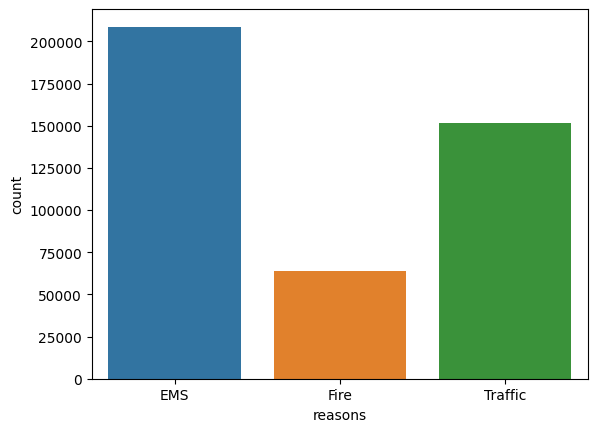

In [17]:
## let us vizualize the results 
sns.countplot(data=data,x='reasons')

As we seen from above vizualize that EMS has highest  apperance and fire has less reprsentation in our data

In [18]:
##changeing dtype 
data['timeStamp']=pd.to_datetime(data['timeStamp'])


In [73]:
##create extra column  useing date time 
data['month']=data['timeStamp'].dt.month
data['Day']=data['timeStamp'].dt.day
data['hour']=data['timeStamp'].dt.hour
data['day_of_weak']=data['timeStamp'].dt.dayofweek
data['date']=data['timeStamp'].dt.date
data['date']=pd.to_datetime(data['date'])

In [130]:
## replce no to day name 
data['day_of_weak']=data.day_of_weak.replace({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

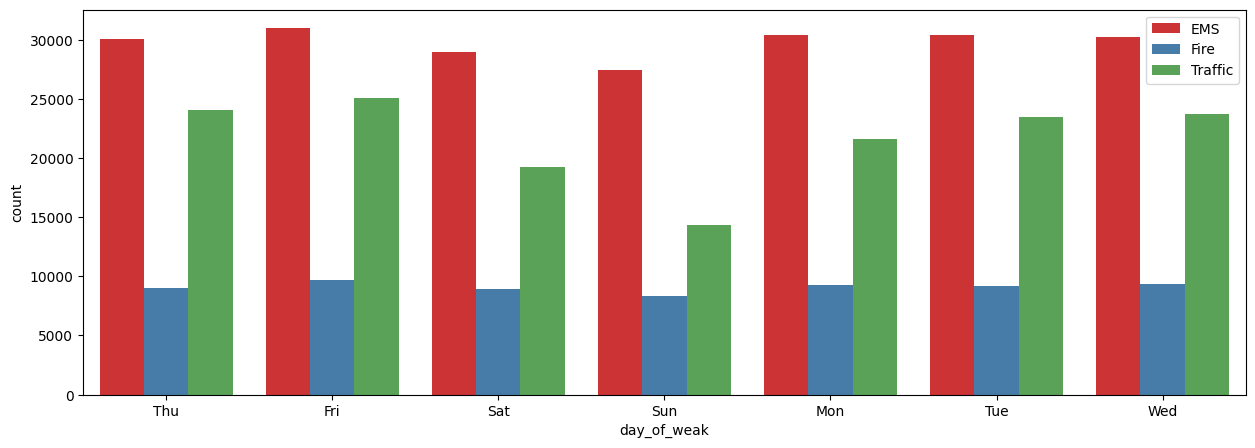

In [132]:
plt.figure(figsize=(15,5))
sns.countplot(data=data,x='day_of_weak',hue='reasons',palette = 'Set1')
plt.legend()
plt.show()

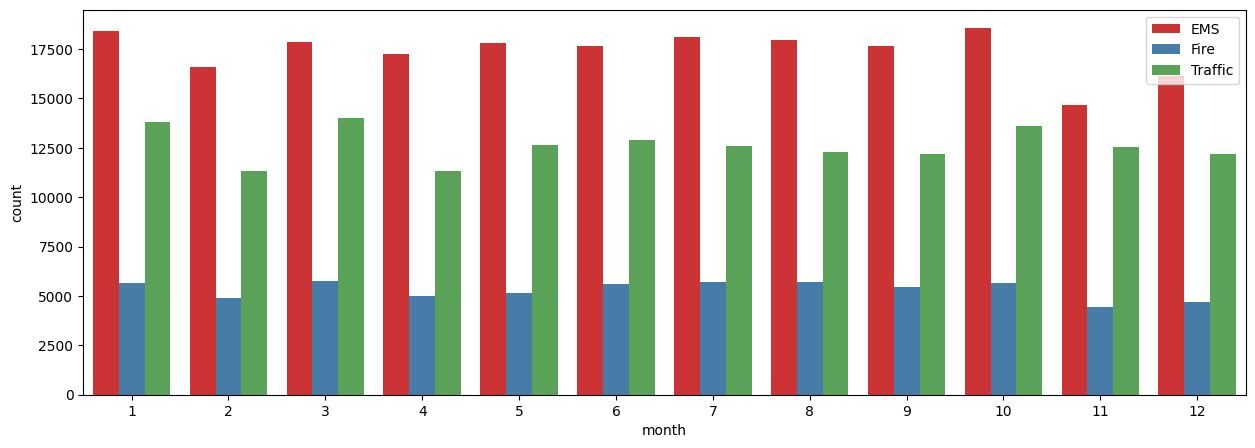

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(data=data,x='month',hue='reasons',palette = 'Set1')
plt.legend()
plt.show()

Text(0, 0.5, 'count')

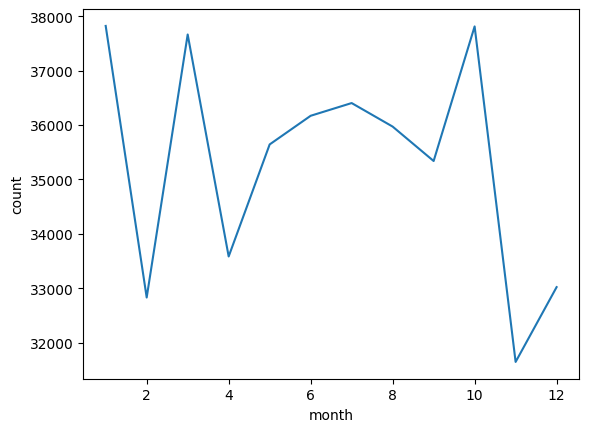

In [47]:
## callling trend per month 
data.groupby('month').count().plot.line(use_index=True,y = 'title',legend = None)
plt.ylabel('count')

Text(0, 0.5, 'count')

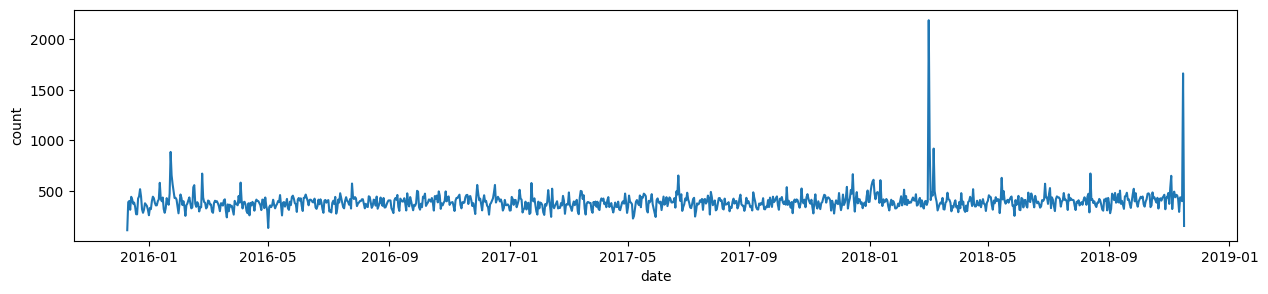

In [53]:
data.groupby('date').count().plot.line(use_index=True,y = 'title',legend = None,figsize=(15,3))
plt.ylabel('count')

Here we notice outlier in march 2018 and in november 2018

# Now we investigating the outlier 

In [90]:
data.groupby(data[(data['date'].dt.year>= 2018) & (data['date'].dt.month==3)]['date']).count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,month,Day,hour,day_of_weak,date
date,,,,,,,,,,,,,,,
2018-03-01,396,396,396,354,396,396,396,396,396,396,396,396,396,396,396
2018-03-02,2187,2187,2187,1986,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187
2018-03-03,917,917,917,836,917,917,917,917,917,917,917,917,917,917,917
2018-03-04,412,412,412,369,412,412,412,412,412,412,412,412,412,412,412
2018-03-05,484,484,484,439,484,484,484,484,484,484,484,484,484,484,484
2018-03-06,456,456,456,397,456,456,455,456,456,456,456,456,456,456,456
2018-03-07,920,920,920,824,920,920,920,920,920,920,920,920,920,920,920
2018-03-08,499,499,499,449,499,499,499,499,499,499,499,499,499,499,499
2018-03-09,439,439,439,396,439,439,439,439,439,439,439,439,439,439,439


As we se from above that on 2nd march  there are  4 time more calls then  rest of the month le us see deeply 

In [94]:
data[data.date == '2018-03-02']['reasons'].value_counts()

Traffic    1328
Fire        568
EMS         291
Name: reasons, dtype: int64

<AxesSubplot: xlabel='reasons', ylabel='count'>

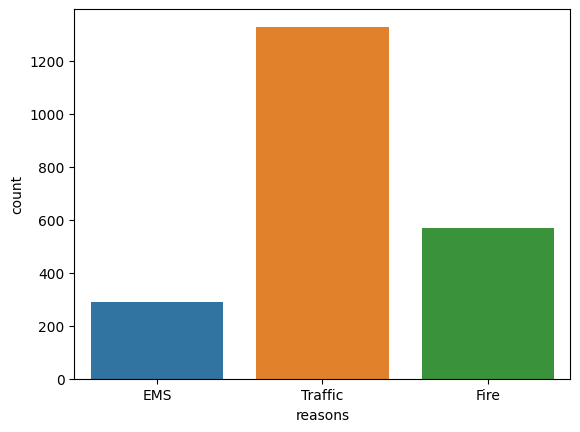

In [97]:
sns.countplot(x='reasons',data=data[data['date']=='2018-03-02'])

After seeing this 
 its  looks differnt from the   countplot of entire data set  here we can  say that their is most likely  an event that cause traffic calls  may be it happen for some reasons 

# NOw  let us cheak in  november month  /

In [108]:
data.groupby(data[(data['date'].dt.year>= 2018) & (data['date'].dt.month==11)]['date']).count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,month,Day,hour,day_of_weak,date
date,,,,,,,,,,,,,,,
2018-11-01,374,374,374,325,374,374,374,374,374,374,374,374,374,374,374
2018-11-02,534,534,534,482,534,534,534,534,534,534,534,534,534,534,534
2018-11-03,651,651,651,562,651,651,650,651,651,651,651,651,651,651,651
2018-11-04,323,323,323,281,323,323,323,323,323,323,323,323,323,323,323
2018-11-05,457,457,457,401,457,457,456,457,457,457,457,457,457,457,457
2018-11-06,495,495,495,441,495,495,495,495,495,495,495,495,495,495,495
2018-11-07,439,439,439,389,439,439,439,439,439,439,439,439,439,439,439
2018-11-08,464,464,464,399,464,464,464,464,464,464,464,464,464,464,464
2018-11-09,458,458,458,418,458,458,458,458,458,458,458,458,458,458,458


<AxesSubplot: xlabel='reasons', ylabel='count'>

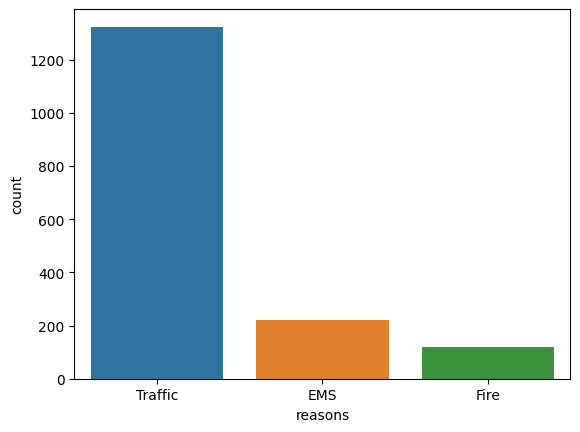

In [107]:
sns.countplot(x='reasons',data=data[data['date']=='2018-11-15'])

So as we see that something is similar  happen to 15 novemeber same as  2nd march  i think it is similar to it  so we have sence that it could be similar to  2nd march

In [109]:
62*65

4030

In [114]:
data.groupby(['date','reasons']).count().unstack()

lat               lng              desc               zip  ...  \
reasons     EMS Fire Traffic  EMS Fire Traffic  EMS Fire Traffic  EMS  ...   
date                                                                   ...   
2015-12-10   58   15      41   58   15      41   58   15      41   53  ...   
2015-12-11  186   68     137  186   68     137  186   68     137  166  ...   
2015-12-12  188   69     145  188   69     145  188   69     145  170  ...   
2015-12-13  191   50      75  191   50      75  191   50      75  179  ...   
2015-12-14  221   39     184  221   39     184  221   39     184  200  ...   
...         ...  ...     ...  ...  ...     ...  ...  ...     ...  ...  ...   
2018-11-12  211   83     144  211   83     144  211   83     144  192  ...   
2018-11-13  187   68     182  187   68     182  187   68     182  168  ...   
2018-11-14  187   54     160  187   54     160  187   54     160  177  ...   
2018-11-15  220  118    1324  220  118    1324  220  118    1324  191  ...   
2018-11-16   45   20      91   45   20      91   45   20      91   42  ...   

             month  Day              hour              day_of_weak       \
reasons    Traffic  EMS Fire Traffic  EMS Fire Traffic         EMS Fire   
date                                                                      
2015-12-10      41   58   15      41   58   15      41          58   15   
2015-12-11     137  186   68     137  186   68     137         186   68   
2015-12-12     145  188   69     145  188   69     145         188   69   
2015-12-13      75  191   50      75  191   50      75         191   50   
2015-12-14     184  221   39     184  221   39     184         221   39   
...            ...  ...  ...     ...  ...  ...     ...         ...  ...   
2018-11-12     144  211   83     144  211   83     144         211   83   
2018-11-13     182  187   68     182  187   68     182         187   68   
2018-11-14     160  187   54     160  187   54     160         187   54   
2018-11-15    1324  220  118    1324  220  118    1324         220  118   
2018-11-16      91   45   20      91   45   20      91          45   20   

                    
reasons    Traffic  
date                
2015-12-10      41  
2015-12-11     137  
2015-12-12     145  
2015-12-13      75  
2015-12-14     184  
...            ...  
2018-11-12     144  
2018-11-13     182  
2018-11-14     160  
2018-11-15    1324  
2018-11-16      91  

[1073 rows x 39 columns]

Text(0, 0.5, 'count')

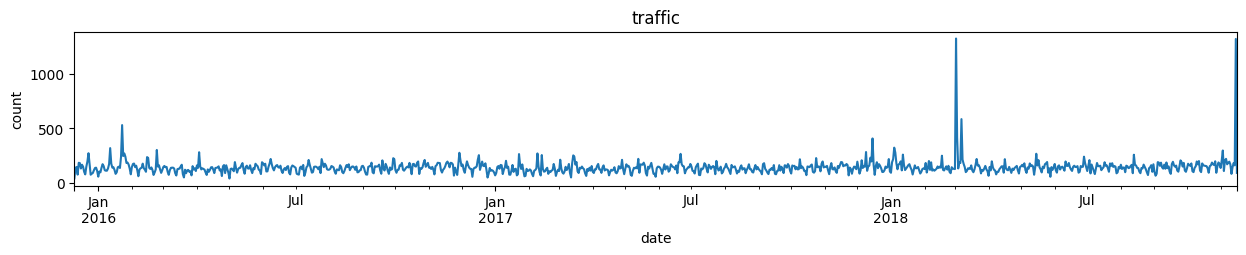

In [122]:
##traffic
data.groupby(['date','reasons'])['title'].count().unstack().plot.line(use_index=True,y='Traffic',figsize=(15,2),legend=None)
plt.title('traffic')
plt.ylabel('count')

Text(0, 0.5, 'count')

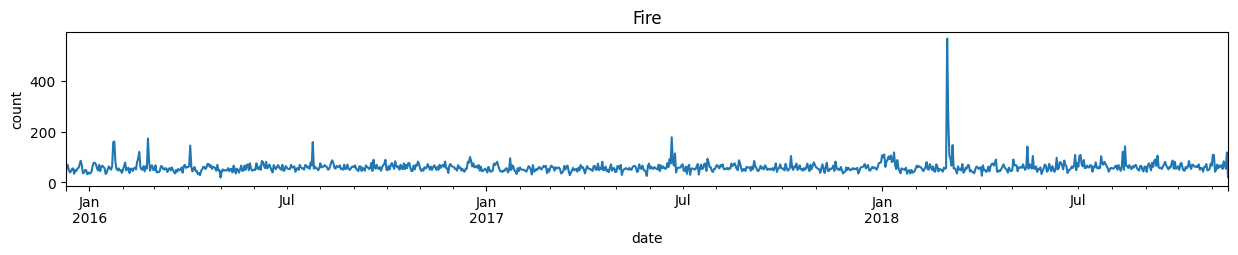

In [124]:
##Fire
data.groupby(['date','reasons'])['title'].count().unstack().plot.line(use_index=True,legend=None,figsize=(15,2),y='Fire')
plt.title('Fire')
plt.ylabel('count')

Text(0.5, 1.0, 'EMS')

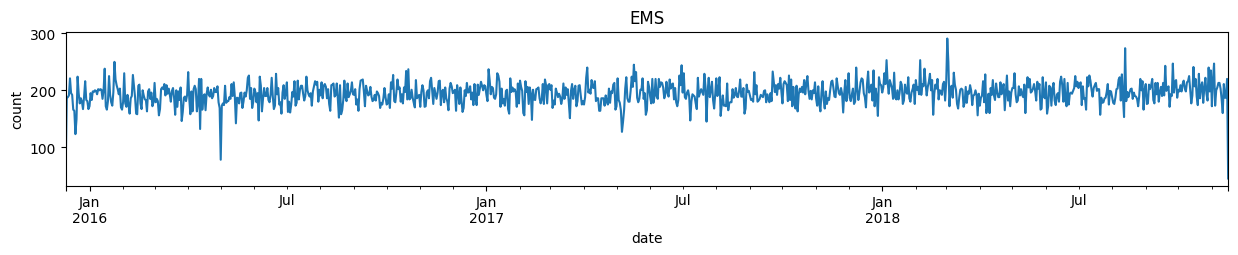

In [125]:
##EMS
data.groupby(['date','reasons'])['title'].count().unstack().plot.line(use_index=True,legend=None,figsize=(15,2),y='EMS')
plt.ylabel('count')
plt.title('EMS')

Now we looking at how the time of day and day of week  interact with no 911 so we see this using heatmap 


In [138]:
dfht = data.groupby(['day_of_weak','hour']).count().unstack()['title']
dfht

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_weak,,,,,,,,,,,,,,,,,,,,,
Fri,1185,1001,930,832,821,1051,1676,2689,3185,3295,...,4150,4514,4711,4489,3616,3254,2789,2445,2210,1866
Mon,1207,974,857,784,871,1124,1729,2829,3588,3685,...,3547,3975,4063,4003,3512,2821,2418,2005,1698,1283
Sat,1515,1332,1206,1012,936,985,1230,1640,2211,2766,...,3479,3284,3348,3274,3174,3036,2632,2432,2073,1913
Sun,1520,1331,1263,1033,954,941,1119,1568,1933,2421,...,2992,2828,2855,2872,2829,2679,2362,1994,1632,1470
Thu,1115,873,920,775,784,1091,1801,2913,3468,3457,...,3904,4139,4053,4412,3578,2923,2579,2230,1784,1486
Tue,1086,918,812,783,824,1075,1806,2912,3650,3563,...,3831,4087,4265,4396,3753,2960,2535,2147,1705,1350
Wed,1022,952,808,795,711,1040,1763,3060,3566,3528,...,3933,4149,4443,4487,3609,2927,2645,2236,1794,1399


<AxesSubplot: xlabel='hour', ylabel='day_of_weak'>

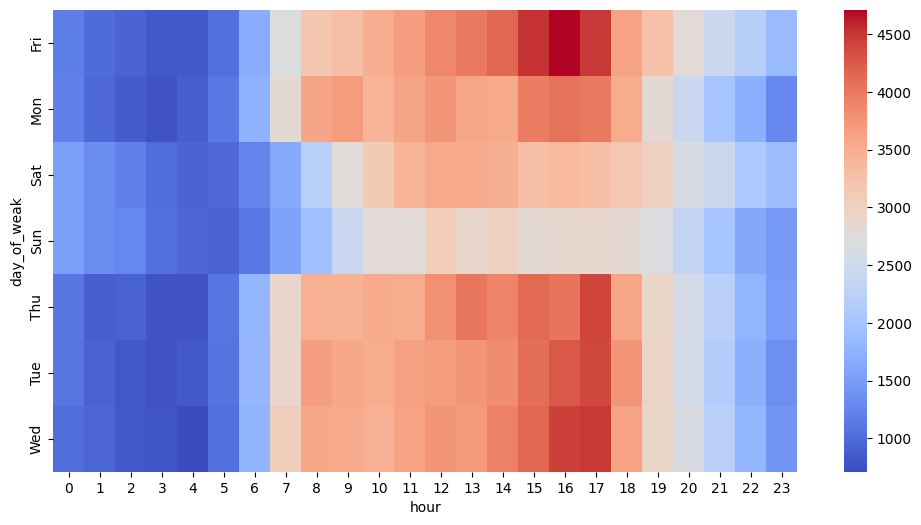

In [143]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(dfht, cmap='coolwarm',ax = ax)

In [145]:
#Creating the dataframe we'll use
dfmt = data.groupby(['day_of_weak','month']).count().unstack()['title']
dfmt

month,1,2,3,4,5,6,7,8,9,10,11,12
day_of_weak,,,,,,,,,,,,
Fri,5532,4848,7344,5195,4989,5867,5380,5312,6010,5179,4525,5570
Mon,5716,5214,4663,5154,5019,5045,5792,5212,4675,6385,4157,4286
Sat,5103,4431,4914,4947,4275,4868,4883,4355,5023,5051,4043,5200
Sun,4882,3806,3569,4628,3940,4019,5114,3963,4245,4852,3210,3896
Thu,4985,4708,6010,4637,5469,5951,4954,5328,5300,4940,5978,4899
Tue,6118,4755,5090,4413,6203,5013,5488,5690,4930,5827,4823,4691
Wed,5488,5066,6076,4609,5749,5408,4794,6112,5156,5581,4907,4477


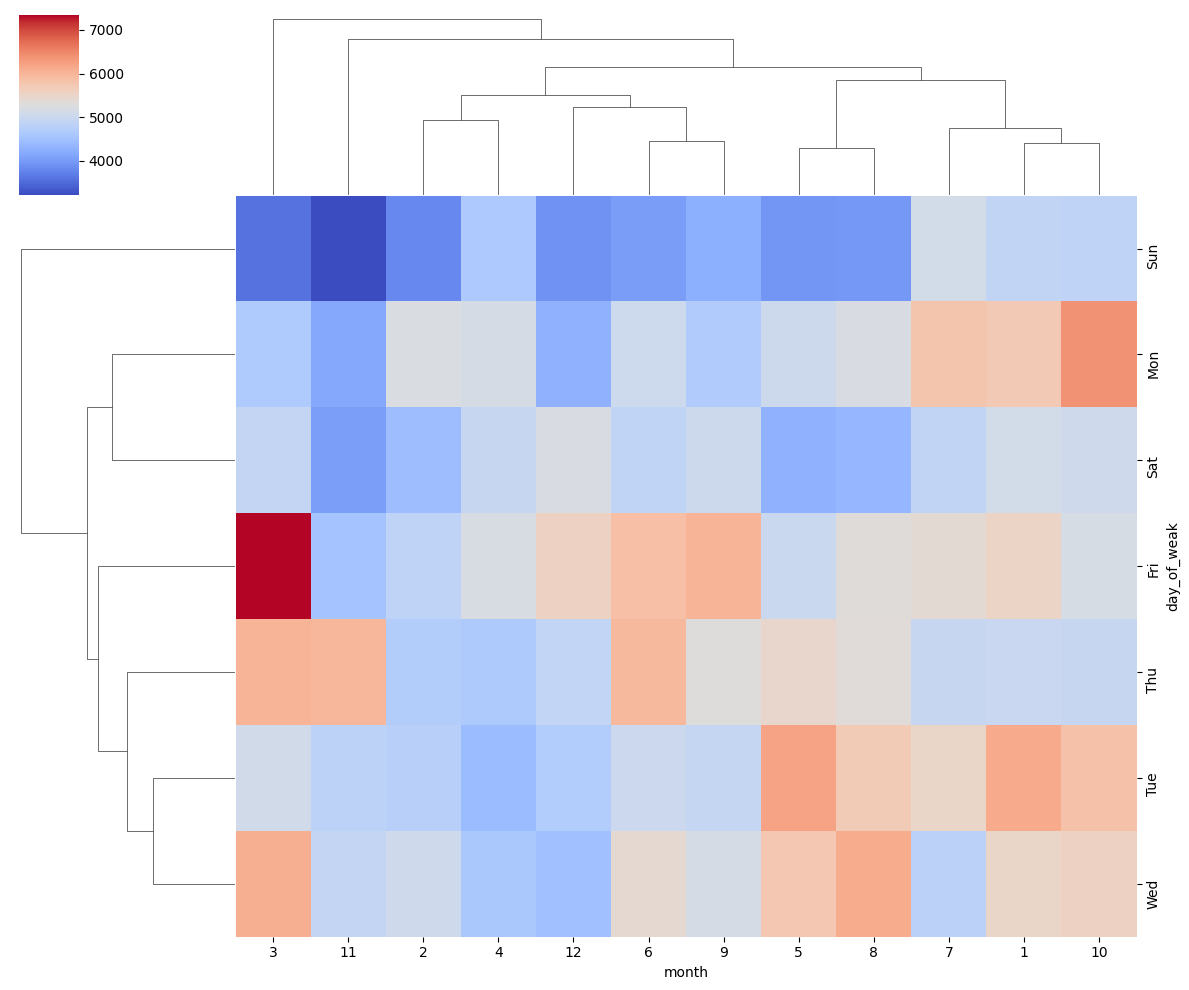

In [146]:
#let's make a cluster map of the same information
sns.clustermap(dfmt, cmap = 'coolwarm', figsize = (12,10))

# In this visual analysis we were able to practice many different visualization techniques while exploring this dataset. We used pandas to create dataframes and sift through our data, reorganizing, extracting, and graphing important data categories that we want to visualize. For the dataset, we found the EMS-related calls represented the most 911 calls, followed by traffic and then fire. We found 2 outliers that occured on March 2nd, 2018 and November 15th, 2018, both likely due to sever weather conditions, and mentioned how, with more research, you could draw insights from the investigation of these two dates and the data behind it.

# Thanks for reading till the end ! If you liked the EDA,  pls do Upvote👍 and give some remarks/advice if you feels some things need to be added
